# 11334 Sameer | 11305 Hadi Stock Rate(Foreign Exchange Rates) Project

In [2]:
import findspark
findspark.init()

In [3]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('jupyter-spark') \
    .enableHiveSupport()\
    .getOrCreate()
sc = spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
# Checking if spark is working or not
spark

In [5]:
!pwd

/notebook


## Loading file on HDFS

In [6]:
!hadoop fs -mkdir -p /tmp/spark/

In [7]:
!hdfs dfs -put /notebook/indexProcessed.csv /tmp/spark/
!hadoop fs -ls /tmp/spark

put: `/tmp/spark/indexProcessed.csv': File exists
Found 22 items
-rw-r--r--   2 root supergroup   64067991 2024-01-06 14:34 /tmp/spark/CAvideos.csv
-rw-r--r--   2 root supergroup   63040138 2024-01-06 14:34 /tmp/spark/DEvideos.csv
-rw-r--r--   2 root supergroup   51424708 2024-01-06 14:34 /tmp/spark/FRvideos.csv
-rw-r--r--   2 root supergroup   53213441 2024-01-06 14:34 /tmp/spark/GBvideos.csv
-rw-r--r--   2 root supergroup   59600439 2024-01-06 14:34 /tmp/spark/INvideos.csv
-rw-r--r--   2 root supergroup   28740747 2024-01-06 14:34 /tmp/spark/JPvideos.csv
-rw-r--r--   2 root supergroup   34835868 2024-01-06 14:34 /tmp/spark/KRvideos.csv
-rw-r--r--   2 root supergroup   45191541 2024-01-06 14:34 /tmp/spark/MXvideos.csv
-rw-r--r--   2 root supergroup   76268286 2024-01-06 14:34 /tmp/spark/RUvideos.csv
-rw-r--r--   2 root supergroup   62756152 2024-01-06 14:34 /tmp/spark/USvideos.csv
drwxr-xr-x   - root supergroup          0 2024-01-06 14:50 /tmp/spark/df_1.parquet
drwxr-xr-x   - root su

In [8]:
rdd = sc.textFile('hdfs:///tmp/spark/indexProcessed.csv')

In [9]:
rdd.foreach(lambda f: print(f))

In [10]:
# since the above function is not working we'll use 
rdd.collect()

['Index,Date,Open,High,Low,Close,Adj Close,CloseUSD',
 'HSI,12/31/1986,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,333.8790064',
 'HSI,1/2/1987,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,330.2130127',
 'HSI,1/5/1987,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,331.8119873',
 'HSI,1/6/1987,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,335.9069873',
 'HSI,1/7/1987,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,338.9230127',
 'HSI,1/8/1987,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,338.4290064',
 'HSI,1/9/1987,2561.699951,2561.699951,2561.699951,2561.699951,2561.699951,333.0209936',
 'HSI,1/12/1987,2614.899902,2614.899902,2614.899902,2614.899902,2614.899902,339.9369873',
 'HSI,1/13/1987,2590.800049,2590.800049,2590.800049,2590.800049,2590.800049,336.8040064',
 'HSI,1/14/1987,2578.199951,2578.199951,2578.199951,2578.199951,2578.199951,335.1659936',
 'HSI,1/15/1987,2559.100098,2559.100098,2559.100098

In [11]:
df = spark.sql(f"SELECT * FROM StockMarket")

In [12]:
df.show()

+-----+-----+-----------+-----------+-----------+-----------+-----------+-----------+
|index|daate|       open|       high|        low|     cloose|  adjcloose|   closeusd|
+-----+-----+-----------+-----------+-----------+-----------+-----------+-----------+
|Index| null|       null|       null|       null|       null|       null|       null|
|  HSI| null|2568.300049|2568.300049|2568.300049|2568.300049|2568.300049|333.8790064|
|  HSI| null|2540.100098|2540.100098|2540.100098|2540.100098|2540.100098|330.2130127|
|  HSI| null|2552.399902|2552.399902|2552.399902|2552.399902|2552.399902|331.8119873|
|  HSI| null|2583.899902|2583.899902|2583.899902|2583.899902|2583.899902|335.9069873|
|  HSI| null|2607.100098|2607.100098|2607.100098|2607.100098|2607.100098|338.9230127|
|  HSI| null|2603.300049|2603.300049|2603.300049|2603.300049|2603.300049|338.4290064|
|  HSI| null|2561.699951|2561.699951|2561.699951|2561.699951|2561.699951|333.0209936|
|  HSI| null|2614.899902|2614.899902|2614.899902|2614.

In [13]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency

In [14]:
# Read the dataset from a CSV file
file_path = 'indexProcessed.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

In [15]:
import pandas as pd

#Mean Median Mode
# Load the CSV file into a DataFrame
file_path = 'indexProcessed.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Calculate mean, median, and mode for all numeric columns
summary_stats = pd.DataFrame(index=['mean', 'median', 'mode'])
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    summary_stats[column] = [df[column].mean(), df[column].median(), df[column].mode()[0]]

# Output the summary statistics
print(summary_stats)

               Open         High          Low        Close    Adj Close  \
mean    9896.083706  9950.700336  9836.912125  9893.824112  9893.328441   
median  7280.580078  7293.279785  7261.490234  7278.439941  7278.439941   
mode    3187.620117  3187.620117  3187.620117  3187.620117  3187.620117   

          CloseUSD  
mean    503.726009  
median  187.279004  
mode     31.876201  


In [16]:
#Correlation
# Load the CSV file into a DataFrame
file_path = 'indexProcessed.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Calculate the correlation matrix for the relevant columns
relevant_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'CloseUSD']
correlation_matrix = df[relevant_columns].corr()

# Output the correlation matrix
print(correlation_matrix)

               Open      High       Low     Close  Adj Close  CloseUSD
Open       1.000000  0.999921  0.999900  0.999837   0.999837 -0.079678
High       0.999921  1.000000  0.999856  0.999921   0.999921 -0.077975
Low        0.999900  0.999856  1.000000  0.999921   0.999921 -0.081583
Close      0.999837  0.999921  0.999921  1.000000   1.000000 -0.079610
Adj Close  0.999837  0.999921  0.999921  1.000000   1.000000 -0.079725
CloseUSD  -0.079678 -0.077975 -0.081583 -0.079610  -0.079725  1.000000


# Using PySpark ML Model

In [17]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import urllib.request

In [18]:
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

24/01/06 16:35:14 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [19]:
url = "https://raw.githubusercontent.com/sameerulhaq000/MachineLearning/main/indexProcessed.csv"


In [20]:
local_file_path = "/indexProcessed.csv"
urllib.request.urlretrieve(url, local_file_path)

('/indexProcessed.csv', <http.client.HTTPMessage at 0x7f22f8121bb0>)

In [21]:
df = pd.read_csv(local_file_path)

In [22]:
!hdfs dfs -ls hdfs://master/

Found 6 items
-rw-r--r--   2 root supergroup    1185010 2024-01-06 13:38 hdfs://master/indexProcessed.csv
drwxr-xr-x   - root supergroup          0 2024-01-06 08:22 hdfs://master/spark
drwxrwx---   - root supergroup          0 2024-01-06 12:55 hdfs://master/tmp
-rw-r--r--   2 root supergroup     205580 2024-01-06 13:26 hdfs://master/usd.csv
drwxr-xr-x   - root supergroup          0 2024-01-06 08:29 hdfs://master/user
drwxr-xr-x   - root supergroup          0 2024-01-06 08:22 hdfs://master/var


In [23]:
!hdfs dfs -put /notebook/indexProcessed.csv /

put: `/indexProcessed.csv': File exists


In [24]:
data = spark.read.csv(local_file_path, header=True, inferSchema=True)

In [25]:
data

DataFrame[Index: string, Date: string, Open: double, High: double, Low: double, Close: double, Adj Close: double, CloseUSD: double]

In [26]:
data.printSchema()
data.show()

root
 |-- Index: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- CloseUSD: double (nullable = true)

+-----+----------+-----------+-----------+-----------+-----------+-----------+-----------+
|Index|      Date|       Open|       High|        Low|      Close|  Adj Close|   CloseUSD|
+-----+----------+-----------+-----------+-----------+-----------+-----------+-----------+
|  HSI|12/31/1986|2568.300049|2568.300049|2568.300049|2568.300049|2568.300049|333.8790064|
|  HSI|  1/2/1987|2540.100098|2540.100098|2540.100098|2540.100098|2540.100098|330.2130127|
|  HSI|  1/5/1987|2552.399902|2552.399902|2552.399902|2552.399902|2552.399902|331.8119873|
|  HSI|  1/6/1987|2583.899902|2583.899902|2583.899902|2583.899902|2583.899902|335.9069873|
|  HSI|  1/7/1987|2607.100098|2607.100098|2607.100098|2607.

In [27]:
assembler = VectorAssembler(inputCols=['Open', 'High', 'Low','Close', 'Adj Close', 'CloseUSD'], outputCol='features')
data = assembler.transform(data)

In [28]:
data = data.withColumnRenamed('Close', 'label')

In [29]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)

In [30]:
lr = LinearRegression(featuresCol='features', labelCol='label')


In [31]:
lr_model = lr.fit(train_data)


24/01/06 16:35:53 WARN Instrumentation: [9d9b32e8] regParam is zero, which might cause numerical instability and overfitting.


24/01/06 16:35:54 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [32]:
predictions = lr_model.transform(test_data)


In [33]:
evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

In [34]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2.1982187718436023e-09
Coefficients: [3.52249771089582e-13,1.83932391052602e-12,-3.4932867993370375e-12,1.000000002012206,-2.0108408049797446e-09,-3.0261890864439088e-12]
Intercept: -3.964760268742452e-10
Root Mean Squared Error (RMSE): 2.1982187718436023e-09


# Linear Regression ML Model

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

In [36]:
data = pd.read_csv("https://raw.githubusercontent.com/sameerulhaq000/MachineLearning/main/indexProcessed.csv")

In [37]:
data

,Index,Date,Open,High,Low,Close,Adj Close,CloseUSD
0,HSI,12/31/1986,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,333.879006
1,HSI,1/2/1987,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,330.213013
2,HSI,1/5/1987,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,331.811987
3,HSI,1/6/1987,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,335.906987
4,HSI,1/7/1987,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,338.923013
...,...,...,...,...,...,...,...,...
14144,GSPTSE,10/29/1984,2359.100098,2359.100098,2350.100098,2353.100098,2347.124512,1953.073081
14145,GSPTSE,10/30/1984,2351.899902,2363.600098,2351.899902,2362.100098,2356.101563,1960.543081
14146,GSPTSE,10/31/1984,2358.800049,2361.199951,2353.000000,2353.300049,2347.324219,1953.239041
14147,GSPTSE,11/1/1984,2352.399902,2357.699951,2350.500000,2354.699951,2348.720459,1954.400959


In [38]:
target = data['Index']
label_to_int = {'HSI': 1, 'N225': 2, 'GSPTSE': 3}
true_labels_int = target.map(label_to_int)

In [39]:
data.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
CloseUSD     0
dtype: int64

In [40]:
data.describe()

,Open,High,Low,Close,Adj Close,CloseUSD
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,9896.083706,9950.700336,9836.912125,9893.824112,9893.328441,503.726009
std,8119.524399,8170.720810,8062.303372,8116.025040,8116.499796,641.101512
min,1020.489990,1020.489990,1020.489990,1020.489990,1020.489990,10.204900
25%,2766.100098,2774.000000,2758.500000,2767.000000,2767.000000,62.109102
50%,7280.580078,7293.279785,7261.490234,7278.439941,7278.439941,187.279004
75%,15626.429690,15769.400390,15463.599610,15626.959960,15626.959960,739.206025
max,38921.648440,38957.441410,38827.710940,38915.871090,38915.871090,2379.219629


In [41]:
data.nunique()

Index            3
Date          9473
Open         13603
High         13620
Low          13611
Close        13643
Adj Close    13692
CloseUSD     13700
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      14149 non-null  object 
 1   Date       14149 non-null  object 
 2   Open       14149 non-null  float64
 3   High       14149 non-null  float64
 4   Low        14149 non-null  float64
 5   Close      14149 non-null  float64
 6   Adj Close  14149 non-null  float64
 7   CloseUSD   14149 non-null  float64
dtypes: float64(6), object(2)
memory usage: 884.4+ KB


In [43]:
data.describe()

,Open,High,Low,Close,Adj Close,CloseUSD
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,9896.083706,9950.700336,9836.912125,9893.824112,9893.328441,503.726009
std,8119.524399,8170.720810,8062.303372,8116.025040,8116.499796,641.101512
min,1020.489990,1020.489990,1020.489990,1020.489990,1020.489990,10.204900
25%,2766.100098,2774.000000,2758.500000,2767.000000,2767.000000,62.109102
50%,7280.580078,7293.279785,7261.490234,7278.439941,7278.439941,187.279004
75%,15626.429690,15769.400390,15463.599610,15626.959960,15626.959960,739.206025
max,38921.648440,38957.441410,38827.710940,38915.871090,38915.871090,2379.219629


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      14149 non-null  object 
 1   Date       14149 non-null  object 
 2   Open       14149 non-null  float64
 3   High       14149 non-null  float64
 4   Low        14149 non-null  float64
 5   Close      14149 non-null  float64
 6   Adj Close  14149 non-null  float64
 7   CloseUSD   14149 non-null  float64
dtypes: float64(6), object(2)
memory usage: 884.4+ KB


In [45]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min()).dt.days

In [46]:
data['Date']

0        8030
1        8032
2        8035
3        8036
4        8037
         ... 
14144    7237
14145    7238
14146    7239
14147    7240
14148    7241
Name: Date, Length: 14149, dtype: int64

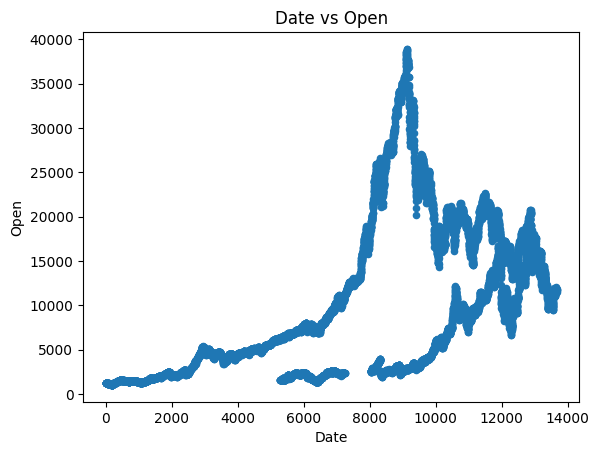

In [47]:
data.plot(x='Date', y='Open', kind='scatter')
plt.title('Date vs Open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [48]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,CloseUSD
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,7759.546611,9896.083706,9950.700336,9836.912125,9893.824112,9893.328441,503.726009
std,3698.159772,8119.524399,8170.720810,8062.303372,8116.025040,8116.499796,641.101512
min,0.000000,1020.489990,1020.489990,1020.489990,1020.489990,1020.489990,10.204900
25%,5263.000000,2766.100098,2774.000000,2758.500000,2767.000000,2767.000000,62.109102
50%,8266.000000,7280.580078,7293.279785,7261.490234,7278.439941,7278.439941,187.279004
75%,10880.000000,15626.429690,15769.400390,15463.599610,15626.959960,15626.959960,739.206025
max,13667.000000,38921.648440,38957.441410,38827.710940,38915.871090,38915.871090,2379.219629


In [49]:
Columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'CloseUSD']

In [50]:
min_max_scaler = MinMaxScaler()
data[Columns] = min_max_scaler.fit_transform(data[Columns])
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,CloseUSD
0,HSI,0.587547,0.040838,0.040800,0.040940,0.040844,0.040844,0.136628
1,HSI,0.587693,0.040094,0.040056,0.040194,0.040100,0.040100,0.135081
2,HSI,0.587912,0.040419,0.040380,0.040519,0.040425,0.040425,0.135756
3,HSI,0.587986,0.041250,0.041211,0.041352,0.041256,0.041256,0.137484
4,HSI,0.588059,0.041862,0.041822,0.041966,0.041868,0.041868,0.138757


In [51]:
data['Index'] = (data['Index'] == 'USD').astype(int)

In [52]:

X = data.drop(['Open'] , axis = 1)
Y = data['Open']


In [53]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.2 , random_state = 30)

In [54]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [55]:
X.size

99043

In [56]:
Y.size

14149

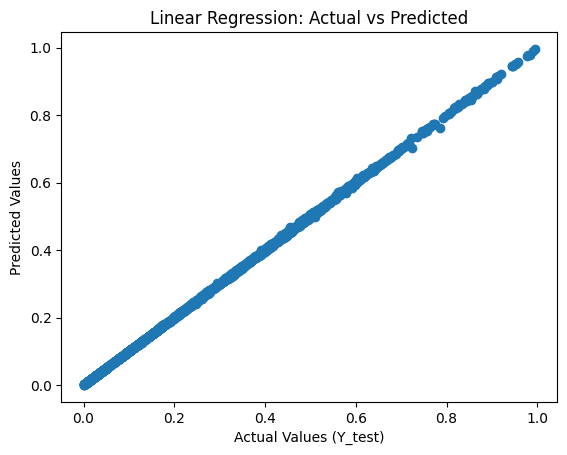

In [57]:

y_pred = model.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


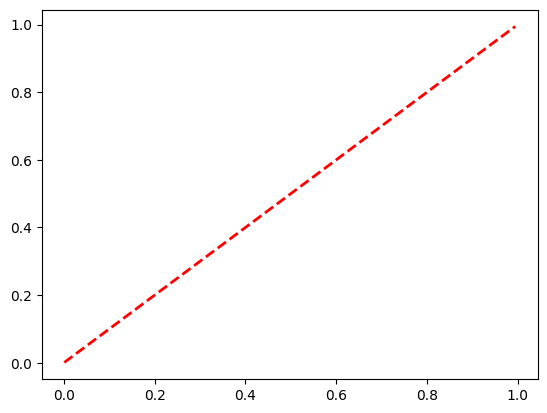

In [58]:
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)

In [59]:
y_pred = model.predict(X_test)

In [60]:
predicted_vs_target = pd.DataFrame({'Predicted': y_pred, 'Target': Y_test})
predicted_vs_target

,Predicted,Target
12854,0.016825,0.016926
12699,0.251522,0.249849
8753,0.319284,0.319474
7494,0.161020,0.161110
12020,0.381255,0.382733
...,...,...
2960,0.231063,0.233726
9307,0.650962,0.651271
1974,0.186981,0.186163
3051,0.321530,0.320736


In [91]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, y_pred))

Mean Absolute Error:  0.0008327265398649373
Mean Squared Error:  2.8538136120404585e-06
Root Mean Squared Error:  0.001689323418425394
Coefficient of Determination (R2 Score):  0.9999378230963039
